In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-dataset/Train_Dev.tsv


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn wordcloud arabic-reshaper python-bidi scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
df=pd.read_csv('/kaggle/input/train-dataset/Train_Dev.tsv',sep='\t')

In [10]:
df.isnull().any()

question    False
answer      False
final_QT    False
final_AS    False
dtype: bool

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter, defaultdict
from itertools import combinations
import arabic_reshaper
import bidi.algorithm
from wordcloud import WordCloud
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set up Arabic text display for matplotlib
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.style.use('seaborn-v0_8')

# Load the dataset
def load_and_preprocess_data(file_path):
    """Load and preprocess the MentalQA dataset"""
    df = pd.read_csv(file_path, sep='\t')
    
    # Parse multi-label columns
    df['final_QT_parsed'] = df['final_QT'].apply(ast.literal_eval)
    df['final_AS_parsed'] = df['final_AS'].apply(ast.literal_eval)
    
    # Add basic text statistics
    df['question_length'] = df['question'].str.len()
    df['answer_length'] = df['answer'].str.len()
    df['question_words'] = df['question'].str.split().str.len()
    df['answer_words'] = df['answer'].str.split().str.len()
    
    # Add multi-label statistics
    df['num_question_labels'] = df['final_QT_parsed'].apply(len)
    df['num_answer_labels'] = df['final_AS_parsed'].apply(len)
    
    return df

In [ ]:
# 1. BASIC DATASET OVERVIEW
def dataset_overview(df):
    """Provide basic dataset overview"""
    print("="*60)
    print("MENTALQA DATASET OVERVIEW")
    print("="*60)
    print(f"Total samples: {len(df)}")
    print(f"Columns: {list(df.columns)}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print()
    
    # Basic statistics
    print("TEXT STATISTICS:")
    print("-" * 30)
    print(f"Question length (chars): {df['question_length'].describe()}")
    print(f"Answer length (chars): {df['answer_length'].describe()}")
    print(f"Question words: {df['question_words'].describe()}")
    print(f"Answer words: {df['answer_words'].describe()}")
    print()
    
    print("MULTI-LABEL STATISTICS:")
    print("-" * 30)
    print(f"Question labels per sample: {df['num_question_labels'].describe()}")
    print(f"Answer labels per sample: {df['num_answer_labels'].describe()}")
    print()

In [ ]:
# 2. QUESTION TYPE ANALYSIS (Sub-Task 1)
def analyze_question_types(df):
    """Analyze question categorization patterns"""
    print("="*60)
    print("SUB-TASK 1: QUESTION TYPE ANALYSIS")
    print("="*60)
    
    # Category mapping
    category_mapping = {
        'A': 'Diagnosis',
        'B': 'Treatment',
        'C': 'Anatomy & Physiology',
        'D': 'Epidemiology',
        'E': 'Healthy Lifestyle',
        'F': 'Provider Choices',
        'Z': 'Other'
    }
    
    # Flatten all question types
    all_qt = [label for labels in df['final_QT_parsed'] for label in labels]
    qt_counts = Counter(all_qt)
    print("QUESTION TYPE DISTRIBUTION:")
    print("-" * 30)
    for cat, count in qt_counts.most_common():
        print(f"{cat} ({category_mapping[cat]}): {count} ({count/len(df)*100:.1f}%)")
    print()
    
    # Multi-label combinations
    qt_combinations = Counter([tuple(sorted(labels)) for labels in df['final_QT_parsed']])
    print("TOP QUESTION TYPE COMBINATIONS:")
    print("-" * 30)
    for combo, count in qt_combinations.most_common(10):
        combo_names = [f"{c}({category_mapping[c]})" for c in combo]
        print(f"{combo_names}: {count} ({count/len(df)*100:.1f}%)")
    print()
    
    # Single vs multi-label
    single_label = sum(1 for labels in df['final_QT_parsed'] if len(labels) == 1)
    multi_label = len(df) - single_label
    print(f"Single-label questions: {single_label} ({single_label/len(df)*100:.1f}%)")
    print(f"Multi-label questions: {multi_label} ({multi_label/len(df)*100:.1f}%)")
    print()
    
    return qt_counts, qt_combinations, category_mapping

LOADING AND PREPROCESSING DATA...
MENTALQA DATASET OVERVIEW
Total samples: 350
Columns: ['question', 'answer', 'final_QT', 'final_AS', 'final_QT_parsed', 'final_AS_parsed', 'question_length', 'answer_length', 'question_words', 'answer_words', 'num_question_labels', 'num_answer_labels']
Memory usage: 0.03 MB

TEXT STATISTICS:
------------------------------
Question length (chars): count    350.000000
mean     160.985714
std       79.898735
min       18.000000
25%       96.250000
50%      159.000000
75%      199.750000
max      402.000000
Name: question_length, dtype: float64
Answer length (chars): count     350.000000
mean      179.457143
std       239.558769
min        13.000000
25%        62.000000
50%       107.000000
75%       203.000000
max      1959.000000
Name: answer_length, dtype: float64
Question words: count    350.000000
mean      30.808571
std       15.515975
min        3.000000
25%       19.000000
50%       30.500000
75%       39.000000
max       77.000000
Name: question_w

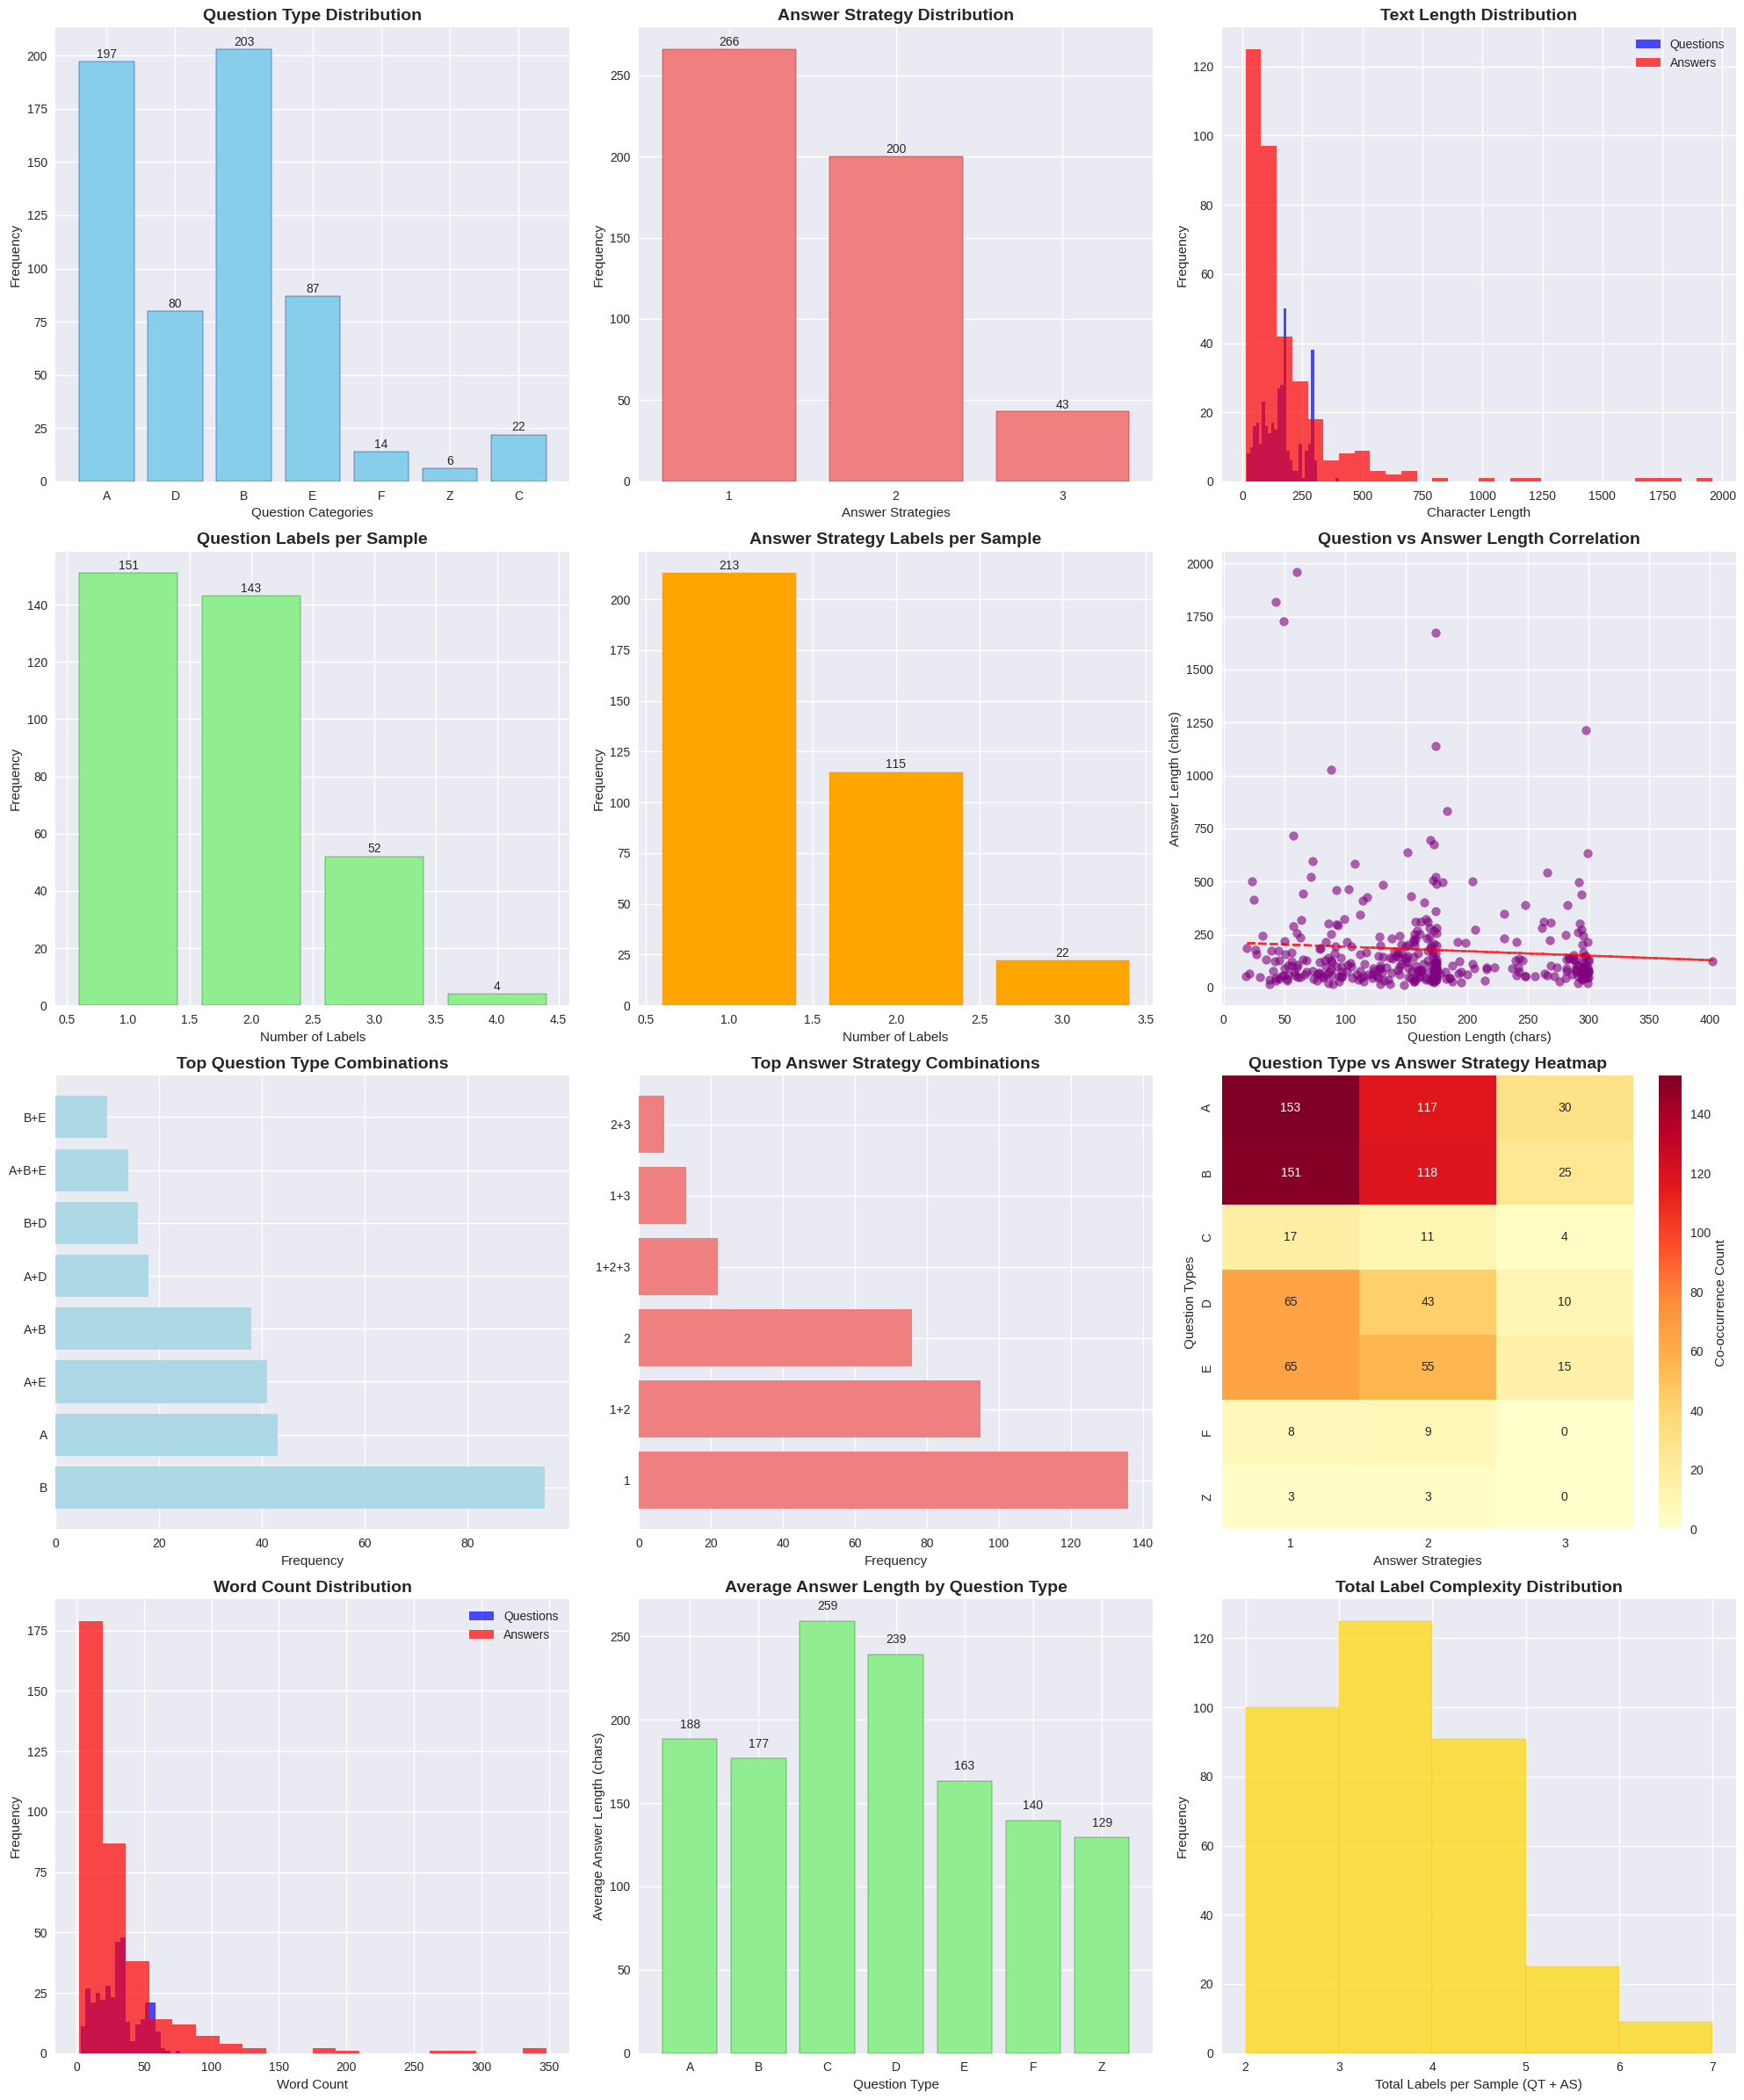

ANALYSIS COMPLETE!
Generated outputs:
- Comprehensive text analysis
- Multi-label pattern analysis
- Cross-task relationship insights
- Data quality assessment
- Statistical significance tests
- Visualization dashboard (mentalqa_analysis.png)

Processed data saved to 'processed_mentalqa.csv'


In [3]:
# 3. ANSWER STRATEGY ANALYSIS (Sub-Task 2)
def analyze_answer_strategies(df):
    """Analyze answer strategy patterns"""
    print("="*60)
    print("SUB-TASK 2: ANSWER STRATEGY ANALYSIS")
    print("="*60)
    
    # Strategy mapping
    strategy_mapping = {
        '1': 'Information',
        '2': 'Direct Guidance',
        '3': 'Emotional Support'
    }
    
    # Flatten all answer strategies
    all_as = [label for labels in df['final_AS_parsed'] for label in labels]
    as_counts = Counter(all_as)
    
    print("ANSWER STRATEGY DISTRIBUTION:")
    print("-" * 30)
    for strat, count in as_counts.most_common():
        print(f"{strat} ({strategy_mapping[strat]}): {count} ({count/len(df)*100:.1f}%)")
    print()
    
    # Multi-label combinations
    as_combinations = Counter([tuple(sorted(labels)) for labels in df['final_AS_parsed']])
    print("TOP ANSWER STRATEGY COMBINATIONS:")
    print("-" * 30)
    for combo, count in as_combinations.most_common(10):
        combo_names = [f"{c}({strategy_mapping[c]})" for c in combo]
        print(f"{combo_names}: {count} ({count/len(df)*100:.1f}%)")
    print()
    
    # Single vs multi-label
    single_label = sum(1 for labels in df['final_AS_parsed'] if len(labels) == 1)
    multi_label = len(df) - single_label
    print(f"Single-label answers: {single_label} ({single_label/len(df)*100:.1f}%)")
    print(f"Multi-label answers: {multi_label} ({multi_label/len(df)*100:.1f}%)")
    print()
    
    return as_counts, as_combinations, strategy_mapping

# 4. QUESTION-ANSWER RELATIONSHIP ANALYSIS (Sub-Task 3)
def analyze_qa_relationships(df):
    """Analyze question-answer relationships"""
    print("="*60)
    print("SUB-TASK 3: QUESTION-ANSWER RELATIONSHIP ANALYSIS")
    print("="*60)
    
    # Length correlations
    length_corr = df['question_length'].corr(df['answer_length'])
    word_corr = df['question_words'].corr(df['answer_words'])
    
    print("Q-A LENGTH CORRELATIONS:")
    print("-" * 30)
    print(f"Character length correlation: {length_corr:.3f}")
    print(f"Word count correlation: {word_corr:.3f}")
    print()
    
    # Average answer length by question type
    print("AVERAGE ANSWER LENGTH BY QUESTION TYPE:")
    print("-" * 30)
    for qt in ['A', 'B', 'C', 'D', 'E', 'F', 'Z']:
        mask = df['final_QT_parsed'].apply(lambda x: qt in x)
        if mask.any():
            avg_len = df[mask]['answer_length'].mean()
            print(f"{qt}: {avg_len:.1f} characters")
    print()
    
    # Response completeness patterns
    print("RESPONSE PATTERN ANALYSIS:")
    print("-" * 30)
    short_answers = sum(1 for length in df['answer_length'] if length < 100)
    medium_answers = sum(1 for length in df['answer_length'] if 100 <= length < 300)
    long_answers = sum(1 for length in df['answer_length'] if length >= 300)
    
    print(f"Short answers (<100 chars): {short_answers} ({short_answers/len(df)*100:.1f}%)")
    print(f"Medium answers (100-300 chars): {medium_answers} ({medium_answers/len(df)*100:.1f}%)")
    print(f"Long answers (>300 chars): {long_answers} ({long_answers/len(df)*100:.1f}%)")
    print()

# 5. CROSS-TASK PATTERN ANALYSIS
def analyze_cross_task_patterns(df):
    """Analyze relationships between question types and answer strategies"""
    print("="*60)
    print("CROSS-TASK PATTERN ANALYSIS")
    print("="*60)
    
    # Question type → Answer strategy mapping
    qt_as_mapping = defaultdict(list)
    for _, row in df.iterrows():
        for qt in row['final_QT_parsed']:
            qt_as_mapping[qt].extend(row['final_AS_parsed'])
    
    print("QUESTION TYPE → ANSWER STRATEGY PATTERNS:")
    print("-" * 30)
    for qt in ['A', 'B', 'C', 'D', 'E', 'F', 'Z']:
        if qt in qt_as_mapping:
            strategies = Counter(qt_as_mapping[qt])
            total = sum(strategies.values())
            print(f"{qt}:")
            for strat, count in strategies.most_common():
                print(f"  → {strat}: {count} ({count/total*100:.1f}%)")
    print()
    
    # Co-occurrence analysis
    print("MULTI-LABEL CO-OCCURRENCE ANALYSIS:")
    print("-" * 30)
    
    # Question type co-occurrences
    qt_pairs = []
    for labels in df['final_QT_parsed']:
        if len(labels) > 1:
            qt_pairs.extend(list(combinations(sorted(labels), 2)))
    
    if qt_pairs:
        qt_cooc = Counter(qt_pairs)
        print("Top Question Type Co-occurrences:")
        for (qt1, qt2), count in qt_cooc.most_common(5):
            print(f"  {qt1} + {qt2}: {count} times")
    
    # Answer strategy co-occurrences
    as_pairs = []
    for labels in df['final_AS_parsed']:
        if len(labels) > 1:
            as_pairs.extend(list(combinations(sorted(labels), 2)))
    
    if as_pairs:
        as_cooc = Counter(as_pairs)
        print("Top Answer Strategy Co-occurrences:")
        for (as1, as2), count in as_cooc.most_common(5):
            print(f"  {as1} + {as2}: {count} times")
    print()

# 6. DATA QUALITY ASSESSMENT
def assess_data_quality(df):
    """Assess data quality and identify potential issues"""
    print("="*60)
    print("DATA QUALITY ASSESSMENT")
    print("="*60)
    
    # Missing values
    print("MISSING VALUES:")
    print("-" * 30)
    print(df.isnull().sum())
    print()
    
    # Empty or very short texts
    print("TEXT QUALITY ISSUES:")
    print("-" * 30)
    very_short_q = sum(1 for length in df['question_length'] if length < 10)
    very_short_a = sum(1 for length in df['answer_length'] if length < 10)
    print(f"Very short questions (<10 chars): {very_short_q}")
    print(f"Very short answers (<10 chars): {very_short_a}")
    
    # Duplicate detection
    duplicate_pairs = df.duplicated(['question', 'answer']).sum()
    print(f"Duplicate Q-A pairs: {duplicate_pairs}")
    print()
    
    # Label distribution balance
    print("LABEL DISTRIBUTION BALANCE:")
    print("-" * 30)
    
    # Question type imbalance
    all_qt = [label for labels in df['final_QT_parsed'] for label in labels]
    qt_counts = Counter(all_qt)
    qt_min, qt_max = min(qt_counts.values()), max(qt_counts.values())
    print(f"Question type imbalance ratio: {qt_max/qt_min:.2f}")
    
    # Answer strategy imbalance
    all_as = [label for labels in df['final_AS_parsed'] for label in labels]
    as_counts = Counter(all_as)
    as_min, as_max = min(as_counts.values()), max(as_counts.values())
    print(f"Answer strategy imbalance ratio: {as_max/as_min:.2f}")
    print()

# 7. VISUALIZATION FUNCTIONS
def create_visualizations(df, qt_counts, as_counts, qt_combinations, as_combinations):
    """Create comprehensive visualizations"""
    
    # Set up the plotting
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Question Type Distribution
    plt.subplot(4, 3, 1)
    categories = list(qt_counts.keys())
    counts = list(qt_counts.values())
    plt.bar(categories, counts, color='skyblue', edgecolor='navy')
    plt.title('Question Type Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Question Categories')
    plt.ylabel('Frequency')
    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # 2. Answer Strategy Distribution
    plt.subplot(4, 3, 2)
    strategies = list(as_counts.keys())
    counts = list(as_counts.values())
    plt.bar(strategies, counts, color='lightcoral', edgecolor='darkred')
    plt.title('Answer Strategy Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Answer Strategies')
    plt.ylabel('Frequency')
    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    # 3. Text Length Distributions
    plt.subplot(4, 3, 3)
    plt.hist(df['question_length'], bins=30, alpha=0.7, label='Questions', color='blue')
    plt.hist(df['answer_length'], bins=30, alpha=0.7, label='Answers', color='red')
    plt.title('Text Length Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Character Length')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 4. Multi-label Distribution
    plt.subplot(4, 3, 4)
    qt_label_counts = df['num_question_labels'].value_counts().sort_index()
    plt.bar(qt_label_counts.index, qt_label_counts.values, color='lightgreen', edgecolor='darkgreen')
    plt.title('Question Labels per Sample', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Labels')
    plt.ylabel('Frequency')
    for i, v in enumerate(qt_label_counts.values):
        plt.text(qt_label_counts.index[i], v + 0.5, str(v), ha='center', va='bottom')
    
    # 5. Answer Strategy Multi-label Distribution
    plt.subplot(4, 3, 5)
    as_label_counts = df['num_answer_labels'].value_counts().sort_index()
    plt.bar(as_label_counts.index, as_label_counts.values, color='orange', edgecolor='darkorange')
    plt.title('Answer Strategy Labels per Sample', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Labels')
    plt.ylabel('Frequency')
    for i, v in enumerate(as_label_counts.values):
        plt.text(as_label_counts.index[i], v + 0.5, str(v), ha='center', va='bottom')
    
    # 6. Question vs Answer Length Correlation
    plt.subplot(4, 3, 6)
    plt.scatter(df['question_length'], df['answer_length'], alpha=0.6, color='purple')
    plt.title('Question vs Answer Length Correlation', fontsize=14, fontweight='bold')
    plt.xlabel('Question Length (chars)')
    plt.ylabel('Answer Length (chars)')
    
    # Add correlation line
    z = np.polyfit(df['question_length'], df['answer_length'], 1)
    p = np.poly1d(z)
    plt.plot(df['question_length'], p(df['question_length']), "r--", alpha=0.8)
    
    # 7. Top Question Type Combinations
    plt.subplot(4, 3, 7)
    top_qt_combos = dict(qt_combinations.most_common(8))
    combo_labels = ['+'.join(combo) for combo in top_qt_combos.keys()]
    plt.barh(range(len(combo_labels)), list(top_qt_combos.values()), color='lightblue')
    plt.yticks(range(len(combo_labels)), combo_labels)
    plt.title('Top Question Type Combinations', fontsize=14, fontweight='bold')
    plt.xlabel('Frequency')
    
    # 8. Top Answer Strategy Combinations
    plt.subplot(4, 3, 8)
    top_as_combos = dict(as_combinations.most_common(6))
    combo_labels = ['+'.join(combo) for combo in top_as_combos.keys()]
    plt.barh(range(len(combo_labels)), list(top_as_combos.values()), color='lightcoral')
    plt.yticks(range(len(combo_labels)), combo_labels)
    plt.title('Top Answer Strategy Combinations', fontsize=14, fontweight='bold')
    plt.xlabel('Frequency')
    
    # 9. Question Type vs Answer Strategy Heatmap
    plt.subplot(4, 3, 9)
    
    # Create co-occurrence matrix
    qt_as_matrix = np.zeros((7, 3))  # 7 question types, 3 answer strategies
    qt_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'Z']
    as_labels = ['1', '2', '3']
    
    for _, row in df.iterrows():
        for qt in row['final_QT_parsed']:
            for as_ in row['final_AS_parsed']:
                qt_idx = qt_labels.index(qt)
                as_idx = as_labels.index(as_)
                qt_as_matrix[qt_idx, as_idx] += 1
    
    sns.heatmap(qt_as_matrix, annot=True, fmt='g', 
                xticklabels=as_labels, yticklabels=qt_labels,
                cmap='YlOrRd', cbar_kws={'label': 'Co-occurrence Count'})
    plt.title('Question Type vs Answer Strategy Heatmap', fontsize=14, fontweight='bold')
    plt.xlabel('Answer Strategies')
    plt.ylabel('Question Types')
    
    # 10. Word Count Distribution
    plt.subplot(4, 3, 10)
    plt.hist(df['question_words'], bins=20, alpha=0.7, label='Questions', color='blue')
    plt.hist(df['answer_words'], bins=20, alpha=0.7, label='Answers', color='red')
    plt.title('Word Count Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 11. Average Answer Length by Question Type
    plt.subplot(4, 3, 11)
    qt_avg_lengths = []
    qt_names = []
    for qt in ['A', 'B', 'C', 'D', 'E', 'F', 'Z']:
        mask = df['final_QT_parsed'].apply(lambda x: qt in x)
        if mask.any():
            avg_len = df[mask]['answer_length'].mean()
            qt_avg_lengths.append(avg_len)
            qt_names.append(qt)
    
    plt.bar(qt_names, qt_avg_lengths, color='lightgreen', edgecolor='darkgreen')
    plt.title('Average Answer Length by Question Type', fontsize=14, fontweight='bold')
    plt.xlabel('Question Type')
    plt.ylabel('Average Answer Length (chars)')
    for i, v in enumerate(qt_avg_lengths):
        plt.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom')
    
    # 12. Distribution of Multi-label Complexity
    plt.subplot(4, 3, 12)
    complexity_data = df['num_question_labels'] + df['num_answer_labels']
    plt.hist(complexity_data, bins=range(2, 8), alpha=0.7, color='gold', edgecolor='orange')
    plt.title('Total Label Complexity Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Total Labels per Sample (QT + AS)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('mentalqa_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# 8. STATISTICAL SIGNIFICANCE TESTS
def statistical_analysis(df):
    """Perform statistical tests on the data"""
    print("="*60)
    print("STATISTICAL ANALYSIS")
    print("="*60)
    
    from scipy import stats
    
    # Test if question length affects number of labels
    print("CORRELATION TESTS:")
    print("-" * 30)
    
    # Question length vs number of question labels
    corr1, p1 = stats.pearsonr(df['question_length'], df['num_question_labels'])
    print(f"Question length vs # of question labels: r={corr1:.3f}, p={p1:.3f}")
    
    # Answer length vs number of answer labels
    corr2, p2 = stats.pearsonr(df['answer_length'], df['num_answer_labels'])
    print(f"Answer length vs # of answer labels: r={corr2:.3f}, p={p2:.3f}")
    
    # Question length vs answer length
    corr3, p3 = stats.pearsonr(df['question_length'], df['answer_length'])
    print(f"Question length vs answer length: r={corr3:.3f}, p={p3:.3f}")
    print()

# 9. MAIN ANALYSIS FUNCTION
def run_complete_analysis(file_path):
    """Run the complete analysis pipeline"""
    print("LOADING AND PREPROCESSING DATA...")
    df = load_and_preprocess_data(file_path)
    
    # Run all analyses
    dataset_overview(df)
    qt_counts, qt_combinations, category_mapping = analyze_question_types(df)
    as_counts, as_combinations, strategy_mapping = analyze_answer_strategies(df)
    analyze_qa_relationships(df)
    analyze_cross_task_patterns(df)
    assess_data_quality(df)
    statistical_analysis(df)
    
    # Create visualizations
    print("CREATING VISUALIZATIONS...")
    create_visualizations(df, qt_counts, as_counts, qt_combinations, as_combinations)
    
    print("="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)
    print("Generated outputs:")
    print("- Comprehensive text analysis")
    print("- Multi-label pattern analysis")
    print("- Cross-task relationship insights")
    print("- Data quality assessment")
    print("- Statistical significance tests")
    print("- Visualization dashboard (mentalqa_analysis.png)")
    
    return df

# 10. USAGE EXAMPLE
if __name__ == "__main__":
    # Run the complete analysis
    # Replace 'Train_Dev.tsv' with your actual file path
    df = run_complete_analysis('/kaggle/input/train-dataset/Train_Dev.tsv')
    
    # Optional: Save processed data
    df.to_csv('processed_mentalqa.csv', index=False)
    print("\nProcessed data saved to 'processed_mentalqa.csv'")

In [4]:
df=pd.read_csv('/kaggle/working/processed_mentalqa.csv')
df

,question,answer,final_QT,final_AS,final_QT_parsed,final_AS_parsed,question_length,answer_length,question_words,answer_words,num_question_labels,num_answer_labels
0,هل يعتبر الخوف من عدم الإنجاب مستقبلاً حالة عا...,سد تى نعم ان هناك العديد من القلق النفسى المرت...,"['A', 'D']","['1', '2']","['A', 'D']","['1', '2']",118,427,22,75,2,2
1,من سنه تقريبا و انا أذي نفسي ب اكثر من طريقة و...,يجب العرض علي طبيب اختصاصي امراض نفسية سوف يقو...,"['B', 'E']",['2'],"['B', 'E']",['2'],152,91,35,14,2,1
2,السلام عليكم مشكلتي تقتصر على تكرار كلمة معينة...,الوسواس القهري هو من الامراض الشاءعة ويكون في ...,"['A', 'E']","['1', '2']","['A', 'E']","['1', '2']",296,165,57,29,2,2
3,اكتئاب وفوبيا من المجتمع وانعزال وانطوائية وتع...,العلاج النفسي المعرفي السلوكي يعطي نتائج جيدة ...,"['B', 'D']",['1'],"['B', 'D']",['1'],56,124,8,21,2,1
4,هل الإحساس بقرب الاجل و الخوف من الموت و الاحل...,نعم بالاضافه للكثير من الاعراض الاخرى الطبيب ا...,"['A', 'B', 'D']","['1', '2']","['A', 'B', 'D']","['1', '2']",127,149,25,25,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
345,قلق وتوتر ووسواس قهري وتأتأة في الكلام وعجز دا...,انشغل بالدراسة أوالعمل أو الأنشطة الاجتماعية و...,['B'],['1'],['B'],['1'],84,98,17,15,1,1
346,اعاني من الخوف وتنبؤات من كلام اهلي وبصمتهم ان...,التقلبات المزاجيه في سنك المبكرة كثيرة ومن الم...,['A'],['1'],['A'],['1'],87,76,16,12,1,1
347,أحس بفقدان التركيز كأنني أنسى معلومة أخبرتني ب...,يجب الإبتعاد عن التوتر وتجنب التشنجات والضغوطا...,['A'],['1'],['A'],['1'],290,81,56,12,1,1
348,انا احس فيني الاكتئاب الجزئي او عسر المزاج نفس...,صعب تعالج نفسك، المناسب هو أن تذهب إلى الطبيب ...,['B'],['1'],['B'],['1'],296,117,59,20,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             350 non-null    object
 1   answer               350 non-null    object
 2   final_QT             350 non-null    object
 3   final_AS             350 non-null    object
 4   final_QT_parsed      350 non-null    object
 5   final_AS_parsed      350 non-null    object
 6   question_length      350 non-null    int64 
 7   answer_length        350 non-null    int64 
 8   question_words       350 non-null    int64 
 9   answer_words         350 non-null    int64 
 10  num_question_labels  350 non-null    int64 
 11  num_answer_labels    350 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 32.9+ KB


In [1]:

import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/train-dataset/Train_Dev.tsv", sep="\t")

# Get max length of strings in 'question' column
max_question_length = df['question'].astype(str).apply(len).max()
print(f"Max length of question: {max_question_length}")

# Get max length of strings in 'answer' column
max_answer_length = df['answer'].astype(str).apply(len).max()
print(f"Max length of answer: {max_answer_length}")


Max length of question: 402
Max length of answer: 1959
